<a href="https://colab.research.google.com/github/SiharaVikashIITD/Machine-Learning/blob/main/K_MeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Mall_Customers
#Unsupervisded Learning  K-means Clustering


Notes: In unsupervised machine learning like clustering, we don't have a dependent variable to predict, so we only need the features for analysis. The goal is to uncover hidden patterns or structures within the data itself. Therefore, we only have the input features, which we can represent as a single matrix typically denoted by X. Additionally, since there's no notion of prediction or evaluation against a test set in unsupervised learning, we do not have to split the data into training and test sets. We'll utilize the entire dataset for clustering analysis.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [ ]:
dataset=pd.read_csv('Mall_Customers.csv')

Here, we're interested in grouping customers based on their spending habits to identify some patterns in the data.The position of annual income and spending score is clear, which is column 3 and 4. So, let's select these two columns from our dataset and store them in a variable named X for further analysis:

In [ ]:
X=dataset.iloc[:,[3,4]].values #selected column 3 & 4

We've got our features (X) ready for k-means clustering. Now, an important step before applying the algorithm is to determine the optimal number of clusters (k) because when you use K-means, you have to decide how many clusters you want to divide your data into. This is where the elbow method comes in. The Elbow Method helps you make that decision.

It involves calculating a metric called the Within-Cluster Sum of Squares or WCSS for different values of k. WCSS represents the total squared distance of data points from their cluster centers, cluster centers imply the mean of the cluster.


We'll use a for loop to iterate through a range of potential k values, typically starting from 1 and going up to a chosen maximum (often 10 or more).Inside the loop, for each value of k, we'll execute the k-means algorithm. This will create k clusters in our data.

After running k-means for a specific k, we'll calculate the WCSS for that particular clustering. WCSS is the sum of squared distances between each data point and its assigned cluster centroid.

We typically don't choose a very high value for the maximum k (like close to the number of data points) because with enough clusters, each data point could become its own cluster in other words a cluster would have only one data point, which would result in a WCSS of zero but wouldn't be a meaningful clustering.

Next, we'll store the calculated WCSS value for each k in a list. After iterating through the loop, we'll have a list of WCSS values corresponding to different numbers of clusters (k). This information will be used to create a visual representation to identify the optimal k.

In [ ]:
wcss=[]
for i in range(1,11) :
  #And now inside this for loop, we'll create a new KMeans object each time through the loop. Since we are iterating from 1 to 11, we'll create 10 different KMeans objects in our case.
  kmeans=KMeans(n_clusters=i, init='k-means++',random_state=42 )
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

When you set a value for the random_state parameter, like random_state=42 in the code, you're essentially locking in the starting point for the algorithm's randomness. So, no matter how many times you run the algorithm with the same setup and data, it will always begin from the same starting point.

Now that we have already trained and run our KMeans algorithm, we need to compute the WCSS (Within-Cluster Sum of Squares) value. We do this by first taking our wcss list, which is so far initialized as an empty list. Then, we use the append function to add a new value inside the list.

The way to get the WCSS value is to call an attribute of the KMeans object called inertia_, which will give us exactly that WCSS value.

#Now, we're ready to plot a simple curve that will visualize the WCSS values for different numbers of clusters from 1 to 10. This curve will depict the WCSS on the y-axis, and the number of clusters used will be on the x-axis.

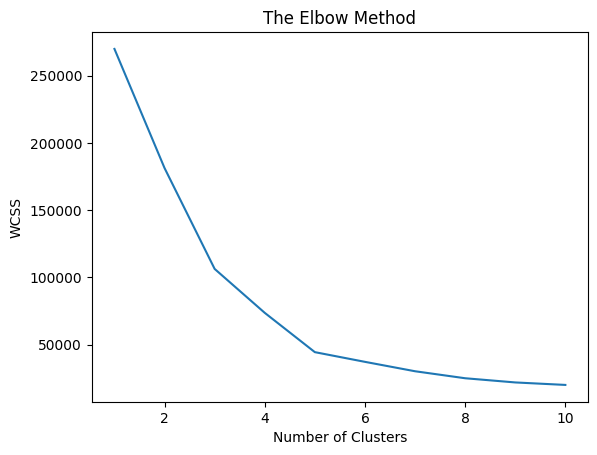

In [ ]:
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Identify the "elbow point," which is the point where the rate of decrease in WCSS slows down significantly.
In our example, the curve seems to be flattening out around 5 clusters. Based on the elbow, this suggests that 5 will be the optimal number of clusters for our data.

#Now we re-train the KMeans model with the optimal number of clusters.

This involves initializing a new KMeans object with the optimal number of clusters which is five and fitting it to your dataset.

In [ ]:
kmeans=KMeans(n_clusters=5,init='k-means++',random_state=42)

Next, we use the trained KMeans model to predict which cluster each data point belongs to. This is done by calling the fit_predict method on the KMeans object with our dataset X.
This line of code performs two crucial actions in a single step:

First .fit() method trains the KMeans model based on our actual data (X), making sure each cluster has similar data points with similar characteristics. And

After training, .predict(X) assigns a label to each data point. So, for every data point in our dataset, the model assigns a label (or cluster number) indicating which group it belongs to.

In [ ]:
y_kmeans=kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In summary, the trained KMeans model (kmeans) predicts which cluster each data point in dataset X belongs to, and stores the predicted cluster labels in the array y_kmeans.

#let's visualize the clusters identified by the KMeans algorithm
To accomplish this, we'll create several scatter plots, one for each cluster. This means we'll plot the data points belonging to cluster 1, then cluster 2, and so on, up to cluster 5.

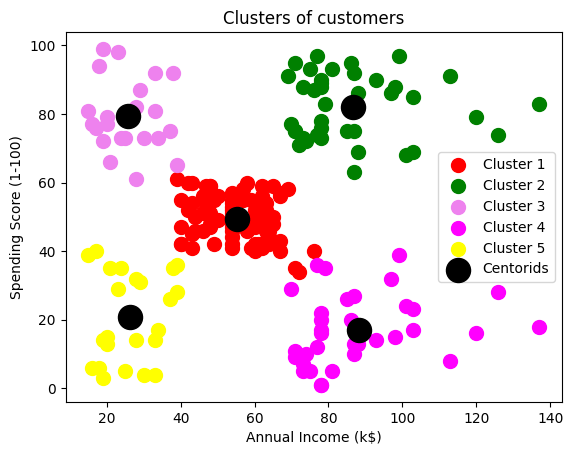

In [ ]:
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1] , s=100 , c='red', label='Cluster 1' )
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1] , s=100 , c='green', label='Cluster 2' )
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1] , s=100 , c='violet', label='Cluster 3' )
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1] , s=100 , c='magenta', label='Cluster 4' )
plt.scatter(X[y_kmeans==4,0],X[y_kmeans==4,1] , s=100 , c='yellow', label='Cluster 5' )
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], s=300, c='black',label='Centorids')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

cluster_centers_ is an attribute (a property) of the kmeans model. In the context of KMeans clustering, this attribute specifically stores the coordinates of the centroids.